<a href="https://colab.research.google.com/github/mssamoilenko/-_optuna/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_optuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому конкурсі вам потрібно проаналізувати набір даних про клієнтів Google Merchandise Store (також відомого як GStore, де продаються товари від Google), щоб передбачити дохід на кожного клієнта.

[посилання](https://www.kaggle.com/competitions/ga-customer-revenue-prediction/overview)

Перейшовши за посиланням, натисність кнопку `Late Submission`

Для завантаження даних використайте наступний код, ваша цільова ознака це стовпчик `totals_transactionRevenue`

In [9]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("/content/data.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 58 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         100000 non-null  int64  
 1   channelGrouping                                    100000 non-null  object 
 2   date                                               100000 non-null  int64  
 3   fullVisitorId                                      100000 non-null  uint64 
 4   socialEngagementType                               100000 non-null  object 
 5   visitId                                            100000 non-null  int64  
 6   visitNumber                                        100000 non-null  int64  
 7   visitStartTime                                     100000 non-null  int64  
 8   device_browser                                     100000 non-null  object 

In [12]:
df['date']

,date
0,20171016
1,20171016
2,20171016
3,20171016
4,20171016
...,...
99995,20170529
99996,20170529
99997,20170529
99998,20170529


In [13]:
df['date'].astype('str')

,date
0,20171016
1,20171016
2,20171016
3,20171016
4,20171016
...,...
99995,20170529
99996,20170529
99997,20170529
99998,20170529


In [14]:
df['date'] = pd.to_datetime(df['date'].astype('str'))

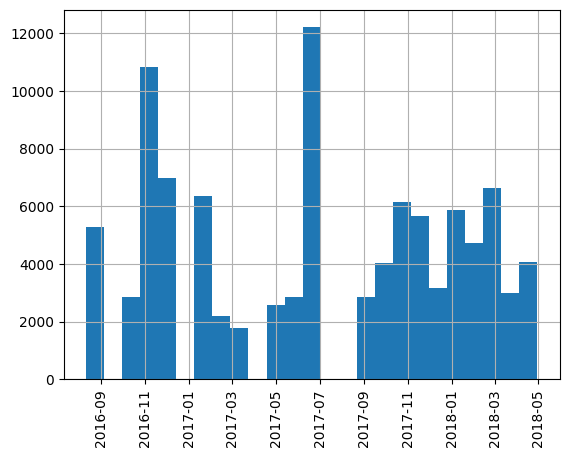

In [15]:
df['date'].hist(bins=25)
plt.xticks(rotation=90)
plt.show()

In [17]:
df['date'].max() - df['date'].min()

Timedelta('626 days 00:00:00')

In [25]:
window_X = pd.Timedelta('90D')
gap = pd.Timedelta('30D')
window_y = pd.Timedelta('60D')

In [30]:
mask = (df['date'].min() + window_X > df['date']) & (df['date'] > df['date'].min())
X1 = df[mask]
X1

,Unnamed: 0,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,...,trafficSource_keyword,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_referralPath,trafficSource_isTrueDirect,trafficSource_adContent,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd
2989,2989,Organic Search,2016-09-02,6664099241683785419,Not Socially Engaged,1472812272,1,1472812272,Firefox,not available in demo dataset,...,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2990,2990,Organic Search,2016-09-02,2673646440140935018,Not Socially Engaged,1472856874,1,1472856874,Chrome,not available in demo dataset,...,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2991,2991,Organic Search,2016-09-02,8154446893490491402,Not Socially Engaged,1472811524,1,1472811524,Chrome,not available in demo dataset,...,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2992,2992,Organic Search,2016-09-02,6335452812400381264,Not Socially Engaged,1472823508,1,1472823508,Safari,not available in demo dataset,...,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2993,2993,Organic Search,2016-09-02,7394449768324113084,Not Socially Engaged,1472839619,1,1472839619,Chrome,not available in demo dataset,...,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92489,92489,Direct,2016-10-14,8265030181325120526,Not Socially Engaged,1476436745,2,1476436745,Chrome,not available in demo dataset,...,NaN,not available in demo dataset,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
92490,92490,Organic Search,2016-10-14,2691311962402313966,Not Socially Engaged,1476479752,1,1476479752,Chrome,not available in demo dataset,...,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92491,92491,Paid Search,2016-10-14,8041285888074428900,Not Socially Engaged,1476469643,2,1476469643,Chrome,not available in demo dataset,...,NaN,not available in demo dataset,NaN,True,NaN,1.0,Top,CjwKEAjwhILABRDwo8mlqt6ug38SJACNSq_khwsXe7Rxd5...,Google Search,False
92492,92492,Organic Search,2016-10-14,244988883787230241,Not Socially Engaged,1476440353,1,1476440353,Chrome,not available in demo dataset,...,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df['date'].min() + window_X

Timestamp('2016-11-09 00:00:00')

In [37]:
mask_y = (df['date'].min() + window_X + gap + window_y > df['date']) & (df['date'] > df['date'].min() + gap + window_X )
Y1 = df[mask_y]
Y1

,Unnamed: 0,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,...,trafficSource_keyword,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_referralPath,trafficSource_isTrueDirect,trafficSource_adContent,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd
8780,8780,Organic Search,2017-01-26,238299079565960449,Not Socially Engaged,1485473898,1,1485473898,Safari,not available in demo dataset,...,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8781,8781,Organic Search,2017-01-26,2873793336796726549,Not Socially Engaged,1485463066,1,1485463066,Chrome,not available in demo dataset,...,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8782,8782,Organic Search,2017-01-26,4484004977153719206,Not Socially Engaged,1485459628,1,1485459628,Chrome,not available in demo dataset,...,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8783,8783,Organic Search,2017-01-26,2938550445207755791,Not Socially Engaged,1485497468,1,1485497468,Chrome,not available in demo dataset,...,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8784,8784,Organic Search,2017-01-26,3861508872157158691,Not Socially Engaged,1485448549,1,1485448549,Chrome,not available in demo dataset,...,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88141,88141,Social,2017-01-11,8781365473772765295,Not Socially Engaged,1484153864,2,1484153864,Chrome,not available in demo dataset,...,NaN,not available in demo dataset,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88142,88142,Social,2017-01-11,5869608911890176679,Not Socially Engaged,1484189204,2,1484189204,Chrome,not available in demo dataset,...,NaN,not available in demo dataset,/l.php,True,NaN,NaN,NaN,NaN,NaN,NaN
88143,88143,Social,2017-01-11,766196273866587875,Not Socially Engaged,1484194294,1,1484194294,Chrome,not available in demo dataset,...,NaN,not available in demo dataset,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88144,88144,Social,2017-01-11,9421290052756424406,Not Socially Engaged,1484157989,7,1484157989,Chrome,not available in demo dataset,...,NaN,not available in demo dataset,/,True,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
num_colum = df.select_dtypes(include='number').columns
num_colum

Index(['Unnamed: 0', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'device_isMobile', 'totals_visits', 'totals_hits',
       'totals_pageviews', 'totals_bounces', 'totals_newVisits',
       'totals_sessionQualityDim', 'totals_timeOnSite', 'totals_transactions',
       'totals_transactionRevenue', 'totals_totalTransactionRevenue',
       'trafficSource_adwordsClickInfo.page'],
      dtype='object')

In [43]:
cat_colum = df.select_dtypes(include='object').columns
cat_colum

Index(['channelGrouping', 'socialEngagementType', 'device_browser',
       'device_browserVersion', 'device_browserSize', 'device_operatingSystem',
       'device_operatingSystemVersion', 'device_mobileDeviceBranding',
       'device_mobileDeviceModel', 'device_mobileInputSelector',
       'device_mobileDeviceInfo', 'device_mobileDeviceMarketingName',
       'device_flashVersion', 'device_language', 'device_screenColors',
       'device_screenResolution', 'device_deviceCategory',
       'geoNetwork_continent', 'geoNetwork_subContinent', 'geoNetwork_country',
       'geoNetwork_region', 'geoNetwork_metro', 'geoNetwork_city',
       'geoNetwork_cityId', 'geoNetwork_networkDomain', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'geoNetwork_networkLocation',
       'trafficSource_campaign', 'trafficSource_source',
       'trafficSource_medium', 'trafficSource_keyword',
       'trafficSource_adwordsClickInfo.criteriaParameters',
       'trafficSource_referralPath', 'trafficSource_isT

In [53]:
def get_mode(column):
  mode = column.mode()
  if len(mode) != 0:
    return mode[0]
  else:
    return 'None'


In [54]:
params = {}

for item in num_colum:
  params[item] = ['mean', 'sum', 'min', 'max']

params

for item in cat_colum:
  params[item] = [get_mode]

params


{'Unnamed: 0': ['mean', 'sum', 'min', 'max'],
 'fullVisitorId': ['mean', 'sum', 'min', 'max'],
 'visitId': ['mean', 'sum', 'min', 'max'],
 'visitNumber': ['mean', 'sum', 'min', 'max'],
 'visitStartTime': ['mean', 'sum', 'min', 'max'],
 'device_isMobile': ['mean', 'sum', 'min', 'max'],
 'totals_visits': ['mean', 'sum', 'min', 'max'],
 'totals_hits': ['mean', 'sum', 'min', 'max'],
 'totals_pageviews': ['mean', 'sum', 'min', 'max'],
 'totals_bounces': ['mean', 'sum', 'min', 'max'],
 'totals_newVisits': ['mean', 'sum', 'min', 'max'],
 'totals_sessionQualityDim': ['mean', 'sum', 'min', 'max'],
 'totals_timeOnSite': ['mean', 'sum', 'min', 'max'],
 'totals_transactions': ['mean', 'sum', 'min', 'max'],
 'totals_transactionRevenue': ['mean', 'sum', 'min', 'max'],
 'totals_totalTransactionRevenue': ['mean', 'sum', 'min', 'max'],
 'trafficSource_adwordsClickInfo.page': ['mean', 'sum', 'min', 'max'],
 'channelGrouping': [<function __main__.get_mode(column)>],
 'socialEngagementType': [<function __

In [55]:
X1.groupby(by = 'fullVisitorId').agg(params)

Unnamed: 0                      fullVisitorId  \
                             mean     sum   min    max          mean   
fullVisitorId                                                          
4681782413258180     69164.250000  276657  5426  91379  4.681782e+15   
4716754086642834     39720.700000  397207  3015  92350  4.716754e+15   
21234147381275782    25245.750000  100983  3213  89679  2.123415e+16   
24221961786219821    41712.000000  291984  3992  92103  2.422196e+16   
34208980776585217    18980.000000  113880  3118  92364  3.420898e+16   
...                           ...     ...   ...    ...           ...   
9947026042460614024  73664.000000  368320  3462  91750  9.947026e+18   
9958282727161780218  38341.200000  191706  3078  90944  9.958283e+18   
9959375007479901087  48648.000000   97296  5508  91788  9.959375e+18   
9972297848679017937  74018.200000  370091  3295  92239  9.972298e+18   
9977822218056364912  47487.833333  284927  3193  91904  9.977822e+18   

                                                                \
                                      sum                  min   
fullVisitorId                                                    
4681782413258180        18727129653032720     4681782413258180   
4716754086642834        47167540866428340     4716754086642834   
21234147381275782       84936589525103128    21234147381275782   
24221961786219821      169553732503538747    24221961786219821   
34208980776585217      205253884659511302    34208980776585217   
...                                   ...                  ...   
9947026042460614024  12841642064883966888  9947026042460614024   
9958282727161780218  12897925488389797858  9958282727161780218   
9959375007479901087   1472005941250250558  9959375007479901087   
9972297848679017937  12968001095975986453  9972297848679017937   
9977822218056364912   4526701087209534624  9977822218056364912   

                                               visitId               ...  \
                                     max          mean          sum  ...   
fullVisitorId                                                        ...   
4681782413258180        4681782413258180  1.475565e+09   5902258812  ...   
4716754086642834        4716754086642834  1.474289e+09  14742894354  ...   
21234147381275782      21234147381275782  1.473752e+09   5895007011  ...   
24221961786219821      24221961786219821  1.474409e+09  10320863710  ...   
34208980776585217      34208980776585217  1.473435e+09   8840609142  ...   
...                                  ...           ...          ...  ...   
9947026042460614024  9947026042460614024  1.475735e+09   7378673191  ...   
9958282727161780218  9958282727161780218  1.474278e+09   7371391405  ...   
9959375007479901087  9959375007479901087  1.474652e+09   2949303542  ...   
9972297848679017937  9972297848679017937  1.475754e+09   7378771045  ...   
9977822218056364912  9977822218056364912  1.474657e+09   8847939227  ...   

                    trafficSource_medium trafficSource_keyword  \
                                get_mode              get_mode   
fullVisitorId                                                    
4681782413258180                  (none)                  None   
4716754086642834                  (none)        (not provided)   
21234147381275782                 (none)        (not provided)   
24221961786219821                 (none)        (not provided)   
34208980776585217               referral        (not provided)   
...                                  ...                   ...   
9947026042460614024             referral                  None   
9958282727161780218               (none)        (not provided)   
9959375007479901087             referral                  None   
9972297848679017937            affiliate                  None   
9977822218056364912               (none)                  None   

                    trafficSource_adwordsClickInfo.criteriaParameters  \
                          